In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/26/x2snc4md15x1tj5_mzlnj2qm0000gn/T/ipykernel_29364/2080034654.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
training_set=pd.read_csv('BTC-USD.csv')                                 

In [3]:
training_set1=training_set.iloc[:,1:2]        #selecting the second column
training_set1.head()                          #print first five rows

,Open
0,0.04951
1,0.04951
2,0.08584
3,0.08080
4,0.07474


In [4]:
training_set1=training_set1.values            #converting to 2d array
training_set1                                 #print the whole data

array([[4.95100000e-02],
       [4.95100000e-02],
       [8.58400000e-02],
       ...,
       [7.70125000e+03],
       [7.59377978e+03],
       [8.25925977e+03]])

In [5]:
#Scaling the data

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()                           #scaling using normalisation 
training_set1 = sc.fit_transform(training_set1)

In [6]:
training_set1.shape

(2765, 1)

In [7]:
xtrain=training_set1[0:2694]                  #input values of rows [0-2694]		   
ytrain=training_set1[1:2695]                  #input values of rows [1-2695]

In [8]:
xtrain

array([[0.00000000e+00],
       [0.00000000e+00],
       [1.87785418e-06],
       ...,
       [5.03065421e-01],
       [5.12028784e-01],
       [5.09031339e-01]])

In [9]:
ytrain

array([[0.00000000e+00],
       [1.87785418e-06],
       [1.61734262e-06],
       ...,
       [5.12028784e-01],
       [5.09031339e-01],
       [5.14150095e-01]])

In [10]:
xtrain.shape

(2694, 1)

In [11]:
ytrain.shape

(2694, 1)

In [12]:
today=pd.DataFrame(xtrain)               #assigning the values of xtrain to today
tomorrow=pd.DataFrame(ytrain)            #assigning the values of xtrain to tomorrow
ex= pd.concat([today,tomorrow],axis=1)        #concat two columns 
ex.columns=(['today','tomorrow'])
xtrain = np.reshape(xtrain, (2694, 1, 1))     #Reshaping into required shape for Keras

In [13]:
today.head()

,0
0,0.000000
1,0.000000
2,0.000002
3,0.000002
4,0.000001


In [14]:
tomorrow.head()

,0
0,0.000000
1,0.000002
2,0.000002
3,0.000001
4,0.000002


In [15]:
ex.head()

,today,tomorrow
0,0.000000,0.000000
1,0.000000,0.000002
2,0.000002,0.000002
3,0.000002,0.000001
4,0.000001,0.000002


In [16]:
xtrain

array([[[0.00000000e+00]],

       [[0.00000000e+00]],

       [[1.87785418e-06]],

       ...,

       [[5.03065421e-01]],

       [[5.12028784e-01]],

       [[5.09031339e-01]]])

In [31]:
ytrain

array([[0.00000000e+00],
       [1.87785418e-06],
       [1.61734262e-06],
       ...,
       [5.12028784e-01],
       [5.09031339e-01],
       [5.14150095e-01]])

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [18]:
#initialize the RNN
regressor=Sequential()

#adding input layerand the LSTM layer 
regressor.add(LSTM(units=4,activation='sigmoid',input_shape=(None,1)))
#adding output layers
regressor.add(Dense(units=1))
#compiling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')
#fitting the RNN to the training set
regressor.fit(xtrain,ytrain,batch_size=32,epochs=2000)

Epoch 1/2000
85/85 [==============================] - 1s 982us/step - loss: 0.0493
Epoch 2/2000
85/85 [==============================] - 0s 864us/step - loss: 0.0099
Epoch 3/2000
85/85 [==============================] - 0s 942us/step - loss: 0.0041
Epoch 4/2000
85/85 [==============================] - 0s 871us/step - loss: 0.0037
Epoch 5/2000
85/85 [==============================] - 0s 862us/step - loss: 0.0036
Epoch 6/2000
85/85 [==============================] - 0s 869us/step - loss: 0.0035
Epoch 7/2000
85/85 [==============================] - 0s 857us/step - loss: 0.0035
Epoch 8/2000
85/85 [==============================] - 0s 852us/step - loss: 0.0034
Epoch 9/2000
85/85 [==============================] - 0s 847us/step - loss: 0.0033
Epoch 10/2000
85/85 [==============================] - 0s 856us/step - loss: 0.0032
Epoch 11/2000
85/85 [==============================] - 0s 875us/step - loss: 0.0031
Epoch 12/2000
85/85 [==============================] - 0s 878us/step - loss: 0.0030
E

In [19]:
# Reading CSV file into test set
test_set = pd.read_csv('BTCtest.csv')
test_set.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-01,9947.080078,10942.799805,9420.929688,10861.469727,10861.469727,1353669597
1,2017-12-02,10861.469727,11175.230469,10715.549805,10912.730469,10912.730469,950474241
2,2017-12-03,10912.719727,11851.089844,10578.429688,11246.209961,11246.209961,1380012064
3,2017-12-04,11244.200195,11624.629883,10917.809570,11623.910156,11623.910156,1057859226
4,2017-12-05,11624.370117,11901.870117,11486.129883,11667.129883,11667.129883,1048839303


In [20]:
real_stock_price = test_set.iloc[:,1:2]         #selecting the second column

real_stock_price = real_stock_price.values      #converting to 2D array

#getting the predicted BTC value of the first week of Dec 2017  
inputs = real_stock_price			
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (8, 1, 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 138ms/step


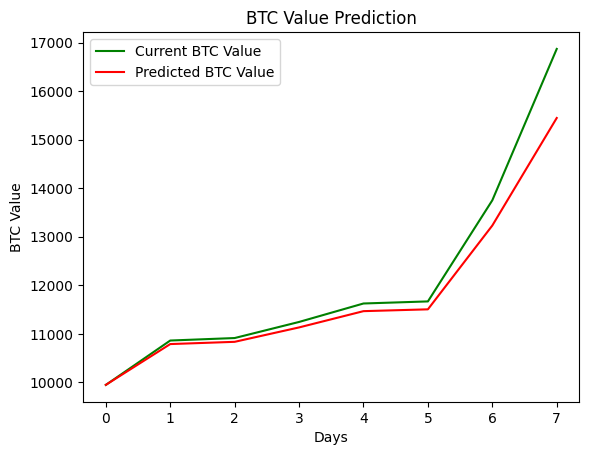

In [21]:

plt.plot(real_stock_price, color = 'green', label = 'Current BTC Value')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted BTC Value')
plt.title('BTC Value Prediction')
plt.xlabel('Days')
plt.ylabel('BTC Value')
plt.legend()
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import math

In [23]:
math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

544.2390475381575

In [24]:
mean_absolute_error(real_stock_price, predicted_stock_price)

315.97534194531204

In [25]:
mean_absolute_percentage_error(real_stock_price, predicted_stock_price)

0.021708779162501295

In [26]:
real_stock_price[-5:]

array([[11244.200195],
       [11624.370117],
       [11667.129883],
       [13750.089844],
       [16867.980469]])

In [27]:
predicted_stock_price[-5:]

array([[11131.491],
       [11466.64 ],
       [11503.982],
       [13230.402],
       [15445.342]], dtype=float32)

In [28]:
for i in range(1, 6):
    rp = real_stock_price[-i]
    pp = predicted_stock_price[-i]
    print(f"Real price: {rp}, predicted price: {pp}, difference: {abs(rp - pp)}")

Real price: [16867.980469], predicted price: [15445.342], difference: [1422.63867212]
Real price: [13750.089844], predicted price: [13230.402], difference: [519.68750025]
Real price: [11667.129883], predicted price: [11503.982], difference: [163.14746112]
Real price: [11624.370117], predicted price: [11466.64], difference: [157.73046856]
Real price: [11244.200195], predicted price: [11131.491], difference: [112.70898406]


Let's not consider the last prediction, which actually differs significatively from the actual value.

In [29]:
math.sqrt(mean_squared_error(real_stock_price[0:len(real_stock_price) -1], predicted_stock_price[0:len(predicted_stock_price) -1]))

222.21879035129476

In [30]:
mean_absolute_percentage_error(real_stock_price[0:len(real_stock_price) -1], predicted_stock_price[0:len(predicted_stock_price) -1])

0.012761519495434383